<a href="https://colab.research.google.com/github/pattrickx/NLP_tweeter/blob/main/NLP_Tweeter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dependencies

In [ ]:
!pip install textblob==0.15.3
!pip install autocorrect
!pip install unidecode

### Imports

In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import os
import sys
import tweepy as tw
import pandas as pd

### Get Tweeter data

In [218]:
api_keys = eval(open("/content/drive/MyDrive/My_projects/api.txt", 'r').read())

In [295]:
auth = tw.OAuthHandler(api_keys['consumer_key'], api_keys['consumer_secret'])
auth.set_access_token(api_keys['access_token'], api_keys['access_token_secret'])
api = tw.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

tweets = tw.Cursor(api.search,
            # q='#BBB OR BBB OR #bbb OR bbb OR #BBB22 OR #bbb22 OR bbb22 OR BBB22 -filter:retweets'
            q='#Flutter OR Flutter OR #flutter OR flutter -filter:retweets'
            ,lang='en'
            # ,since="2022-02-17"
            # ,until="2022-02-18"
            ,result_type="recent"
            ).items(2000)

BBB_list = []
for tweet in tweets:
    BBB_list.append([tweet.created_at,tweet.text])
    # BBB_list +=f" {tweet.text}"

# df_tweet = pd.DataFrame(columns=['created_at','text'],data=BBB_list)
# df_tweet.to_csv("/content/drive/MyDrive/My_projects/df_tweet.csv")
BBB_string=''
for i in BBB_list:
    BBB_string +=f"{i[1]} "
len(BBB_list)

2000

### Word Cloud

#### Stopwords

In [296]:
# importa a biblioteca
import nltk

# baixa as stopwords
nltk.download('stopwords')

# para escolher as stopwords do português adicionamos a opçaõ de língua "portuguese"
stopwords = nltk.corpus.stopwords.words('portuguese') + nltk.corpus.stopwords.words('english')
stopwords_full = stopwords

BBB_stopwords = ['https','pra','co','of','tá','né',
                 'hj','vc','ta','pq','on','CO','Co','SGDmAmMPVT',
                 'RT','pro','acho','vou','to','tô',
                 'siteptbr',
                #  'RedeBBB','bbb','BBB','bbb22','BBB22','bbb21','bbb2022','BBB222','chartspostbbb20'
                #  'TheSims','thesims','TheSims4','Sims','Sim','Sims4'
                #  'Dorama','dorama'
                #  'SNK','AOT','AttackOnTitan', 'ShingekiNoKyojin','anime','Attack on Titan'
                #  'flutter','Flutter'
                #  'NFT','nft'
                #  'monark','Monark'
                ]

stopwords_full = stopwords + BBB_stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Create cloud

In [297]:
mask_path = '/content/drive/MyDrive/My_projects/twitter-logo.png'
mask = np.array(Image.open(mask_path))
wc = WordCloud(
    background_color='white',
    stopwords=stopwords_full,
    height=720,
    width=1080,
    mask=mask,
   contour_color='black',
   contour_width=2
)
wc.generate(BBB_string)
wc.to_file('wc.png')

# Analysis

##Data cleaning

In [298]:
import re
from bs4 import BeautifulSoup 
from autocorrect import Speller
import unidecode
import nltk.corpus
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [299]:
# !wget https://data.iana.org/TLD/tlds-alpha-by-domain.txt
# top_level_domains_list = open('tlds-alpha-by-domain.txt','r').read().splitlines()[1:]
# print(top_level_domains_list)
# top_level_domains_string=""
# for i in top_level_domains_list:
#     top_level_domains_string += f"|.{i}".lower() if top_level_domains_string else f".{i}".lower()
# print(top_level_domains_string)

In [300]:
def remove_urls(text):
    # Removing all the occurrences of links that starts with https
    remove_https = re.sub(r'http\S+', '', text)
    remove_https = re.sub(r'www.+', '', remove_https)
    # Remove all the occurrences of text that ends with .com
    # remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
    return remove_https

In [301]:
def remove_newlines_tabs(text):
    # Replacing all the occurrences of \n,\\n,\t,\\ with a space.
    Formatted_text = text.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\\', ' ').replace('. com', '.com')
    return Formatted_text

In [302]:
def strip_html_tags(text):
    # Initiating BeautifulSoup object soup.
    soup = BeautifulSoup(text, "html.parser")
    # Get all the text other than html tags.
    stripped_text = soup.get_text(separator=" ")
    return stripped_text

In [303]:
def lower_casing_text(text):
    # Convert text to lower case
    # lower() - It converts all upperase letter of given string to lowercase.
    text = text.lower()
    return text

In [304]:
def reducing_incorrect_character_repeatation(text):
    """
    This Function will reduce repeatition to two characters 
    for alphabets and to one character for punctuations.
    
    arguments:
         input_text: "text" of type "String".
         
    return:
        value: Finally formatted text with alphabets repeating to 
        two characters & punctuations limited to one repeatition 
        
    Example:
    Input : Realllllllllyyyyy,        Greeeeaaaatttt   !!!!?....;;;;:)
    Output : Reallyy, Greeaatt !?.;:)
    
    """
    # Pattern matching for all case alphabets
    Pattern_alpha = re.compile(r"([A-Za-z])\1{1,}", re.DOTALL)
    
    # Limiting all the  repeatation to two characters.
    Formatted_text = Pattern_alpha.sub(r"\1\1", text) 
    
    # Pattern matching for all the punctuations that can occur
    Pattern_Punct = re.compile(r'([.,/#!$%^&*?;:{}=_`~()+-])\1{1,}')
    
    # Limiting punctuations in previously formatted string to only one.
    Combined_Formatted = Pattern_Punct.sub(r'\1', Formatted_text)
    
    # The below statement is replacing repeatation of spaces that occur more than two times with that of one occurrence.
    Final_Formatted = re.sub(' {2,}',' ', Combined_Formatted)
    return Final_Formatted

In [305]:
def removing_special_characters(text):
    """Removing all the special characters except the one that is passed within 
       the regex to match, as they have imp meaning in the text provided.
   
    
    arguments:
         input_text: "text" of type "String".
         
    return:
        value: Text with removed special characters that don't require.
        
    Example: 
    Input : Hello, K-a-j-a-l. Thi*s is $100.05 : the payment that you will recieve! (Is this okay?) 
    Output :  Hello, Kajal. This is $100.05 : the payment that you will recieve! Is this okay?
    
   """
    # The formatted text after removing not necessary punctuations.
    Formatted_Text = re.sub(r"[^a-zA-Z:$-,%.?!]+", ' ', text) 
    # In the above regex expression,I am providing necessary set of punctuations that are frequent in this particular dataset.
    return Formatted_Text

In [306]:
def spelling_correction(text,lang='en'):
    ''' 
    This function will correct spellings.
    
    arguments:
         input_text: "text" of type "String".
         
    return:
        value: Text after corrected spellings.
        
    Example: 
    Input : This is Oberois from Dlhi who came heree to studdy.
    Output : This is Oberoi from Delhi who came here to study.
      
    
    '''
    # Check for spellings in English language
    spell = Speller(lang=lang)
    Corrected_text = spell(text)
    return Corrected_text

In [307]:
def remove_stopwords(text,lang='en'):

    stopwords_list = stopwords.words('english')
    if lang == 'pt':
        stopwords_list = nltk.corpus.stopwords.words('portuguese')

    text = repr(text)
    # Text without stopwords
    No_StopWords = [word for word in word_tokenize(text) if word.lower() not in stopwords_list ]
    # Convert list of tokens_without_stopwords to String type.
    words_string = ' '.join(No_StopWords)    
    return words_string

In [308]:
def pre_process(text, lang ='en'):
    text = remove_urls(text.lower())
    text = remove_newlines_tabs(text)
    text = unidecode.unidecode(text) # remove acentos
    text = remove_stopwords(text,lang)
    text = reducing_incorrect_character_repeatation(text)
    text = removing_special_characters(text)
    spelling_correction(text,lang)
    return text

In [309]:
text_list = ['O Arthur tá insuportável!!! #BBB22 E o Arthur #RedeBBBB #JadePicon #JadePicon Que o Arthur https://t.co/akhVbZI4MJ',
             '• Opinem!🗯 ESLOVÊNIA 🇸🇮 #BBB22 , Arthur anjo , scooby e pa, linna e jessi, #arthuraguiar , #JadePicon',
             '@jadepicon provocandoo Arthur ADM, sabe que o emoji dele é um pão 😭😭😭😭😭😭😭😭😭😭😭','@JadePInfos @jadepicon EUUUU VAMOOO cambada 💖',
             '@Annasousa_9 @jadepicon BRIGADA NENEEEE','Eu vendo os adm da @jadepicon E do @iampauloandre interagindo e zoando com as situações hahaha amooooo 💜💓 https://t.co/X44tw64Qn2',
             '@comentacaroles É ESSE TIPO DE TRABALHO TEM QUE SE FEITO DESMENTIR NA HORA QUALQUER FAKE @jadepicon @LeoPicon']
for text in text_list:
    print(pre_process(text,'pt'))

'o arthur ta insuportavel ! ! ! bb arthur redebb jadepicon jadepicon arthur '
'* opinem ! eslovenia bb , arthur anjo , scooby pa , linna jessi , arthuraguiar , jadepicon '
' jadepicon provocandoo arthur adm , sabe emoji pao '
' jadepinfos jadepicon euu vamoo cambada '
' annasousa jadepicon brigada nenee '
'eu vendo adm jadepicon iampauloandre interagindo zoando situacoes hahaha amoo '
' comentacaroles tipo trabalho feito desmentir hora qualquer fake jadepicon leopicon '


##Analisis

In [264]:
from textblob import TextBlob

In [265]:
def is_english(text):
    if text.detect_language() == 'en':
        return True
    return False

In [266]:
def tweet_analysis():
    polarities = []
    erros = 0
    Tweets_data=[]
    for n,tweet in enumerate(BBB_list):
        # if n>100:
        #     break
        phrase = TextBlob(pre_process(tweet[1],'en'))
        
        try:
            # if not is_english(phrase):
            # phrase = TextBlob(str(phrase.translate(to='en')))

            if (phrase.sentiment.polarity != 0.0 and phrase.sentiment.subjectivity != 0.0):
                polarities.append(phrase.sentiment.polarity)


            # print('Tweet: ' + tweet[1])
            # print('Polarity: ' + str(phrase.sentiment.polarity) + " \ " + str(phrase.sentiment.subjectivity))
            # print('.....................')
            Tweets_data.append([tweet[0],tweet[1],phrase.sentiment.polarity,phrase.sentiment.subjectivity])
        except:
            erros+=1
            print(f"erro n: {erros}")
            pass

    print(f"erro n: {erros}")
    return pd.DataFrame(columns=['time','tweet','polarity','subjectivity'],data=Tweets_data)

In [282]:
def print_result_new(mean):
    if mean >= 0.6:
        print(f"VERY POSITIVE \nMean:{mean}")
    elif mean >= 0.2:
        print(f"POSITIVE \nMean:{mean}") 
    elif mean == 0.0:
        print(f"TRUE NEUTRO \nMean:{mean}")
    elif mean>=-0.2:
        print(f"NEUTRO \nMean:{mean}")
    elif mean>=-0.6:
        print(f"NEGATIVE \nMean:{mean}")
    else:
        print(f"VERY NEGATIVE \nMean:{mean}")

In [329]:
def print_result(mean):
    if mean > 0.0:
        print(f"POSITIVE \nMean:{mean}")
    elif mean == 0.0:
        print(f"NEUTRO \nMean:{mean}")
    else:
        print(f"NEGATIVE \nMean:{mean}")

In [330]:
def result(mean):
    if mean > 0.0:
        return "POSITIVE"
    elif mean == 0.0:
        return "NEUTRO"
    else:
        return "NEGATIVE"

In [331]:
def result_new(mean):
    if mean >= 0.6:
        return "VERY POSITIVE"
    elif mean >= 0.2:
        return "POSITIVE"
    elif mean > 0.0:
        return "LITTLE POSITIVE"
    elif mean == 0.0:
        return "NEUTRO"
    elif mean>=-0.2:
        return "LITTLE NEGATIVE"
    elif mean>=-0.6:
        return "NEGATIVE"
    
    return "VERY NEGATIVE"

In [310]:
df_tweets = tweet_analysis()
df_tweets

erro n: 0


,time,tweet,polarity,subjectivity
0,2022-02-21 03:22:17,what 😭 the 😭 fuck 😭 he 😭 makes 😭 my 😭 heart 😭 ...,-0.400000,0.600000
1,2022-02-21 03:21:37,just looking at him listening to people who ta...,-0.100000,1.000000
2,2022-02-21 03:20:35,@leofwaru Something like pulls at your heartst...,-0.166667,0.166667
3,2022-02-21 03:17:47,"Wait a sec, that's sensationalism? No it's not...",-0.125000,0.600000
4,2022-02-21 03:16:51,#NBAAllStarLoved seeing all the #Legends honor...,0.000000,0.000000
...,...,...,...,...
1995,2022-02-19 15:22:29,Code https://t.co/y3ycJ12jUG,0.000000,0.000000
1996,2022-02-19 15:22:28,Example https://t.co/MSnvqtf2So,0.000000,0.000000
1997,2022-02-19 15:22:27,Properties\n\nlabel : Widget\nlabel of the Fil...,0.000000,0.000000
1998,2022-02-19 15:22:27,Filterchips are used where you want to select ...,0.000000,0.000000


In [334]:
polarity_mean = np.mean(df_tweets['polarity'])
print_result(polarity_mean)
print_result_new(polarity_mean)

POSITIVE 
Mean:0.11468417378831555
NEUTRO 
Mean:0.11468417378831555


In [335]:
weighted_polarity_mean = np.average(df_tweets['polarity'],weights=df_tweets['subjectivity'])
print_result(weighted_polarity_mean)
print_result_new(weighted_polarity_mean)

POSITIVE 
Mean:0.2328126730953661
POSITIVE 
Mean:0.2328126730953661


NEUTRO      987
POSITIVE    765
NEGATIVE    248
Name: sentiment, dtype: int64


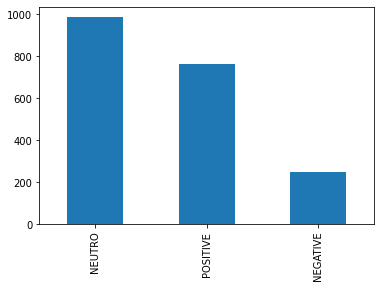

In [332]:
df_tweets['sentiment'] = df_tweets['polarity'].apply(lambda r: result(r))
df_tweets['sentiment'].value_counts().plot.bar()
print(df_tweets['sentiment'].value_counts())

NEUTRO             987
POSITIVE           402
LITTLE POSITIVE    191
VERY POSITIVE      172
LITTLE NEGATIVE    139
NEGATIVE            97
VERY NEGATIVE       12
Name: sentiment, dtype: int64


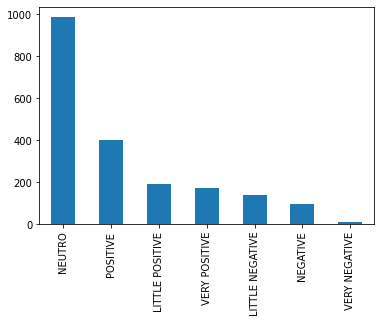

In [333]:
df_tweets['sentiment'] = df_tweets['polarity'].apply(lambda r: result_new(r))
df_tweets['sentiment'].value_counts().plot.bar()
print(df_tweets['sentiment'].value_counts())

In [311]:
import cv2
from matplotlib import pyplot as plt

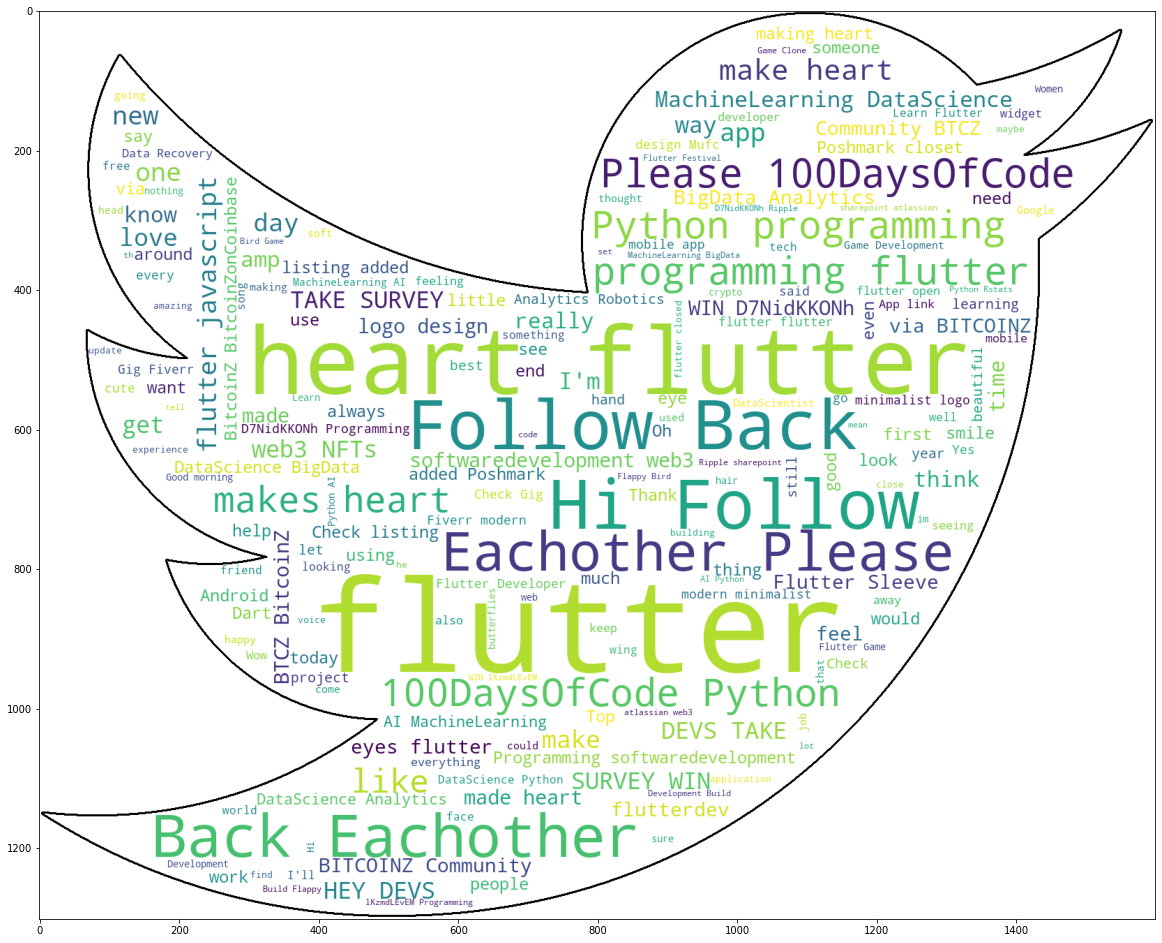

In [317]:
img = cv2.imread('wc.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()